In [1]:
import loaddata as ld
import pandas as pd
reload(ld)
metacritic_df,movies_df = ld.load_data()
print len(metacritic_df) 
print len(movies_df) 
#metacritic_df.to_excel('C:\Bigdatatraining\ct16_cap1_ds5\metacritic.xlsx')
#movies_df.to_excel('C:\Bigdatatraining\ct16_cap1_ds5\movies.xlsx')
metacritic_df['title_nopunc'] = metacritic_df['title'].str.replace('[^\w\s]','')
movies_df['title_nopunc'] = movies_df['title'].str.replace('[^\w\s]','')
movies_df['title_nopunc'] = movies_df['title_nopunc'].str.lower()
metacritic_df['title_nopunc'] = metacritic_df['title_nopunc'].str.lower()
movies_df['title_nopunc'] = movies_df['title_nopunc'].str.strip()
metacritic_df['title_nopunc'] = metacritic_df['title_nopunc'].str.strip()

full_df = pd.merge(movies_df, metacritic_df, how='inner', on=['title_nopunc','year'], sort=True)
print len(full_df)

4765
3728
3242


In [113]:
#full_df.describe()
full_df_clean = full_df[full_df.user_score != 'tbd']
print len(full_df_clean)
full_df_clean = full_df_clean[full_df_clean.user_score != '']
print len(full_df_clean)
full_df_clean = full_df_clean[~full_df_clean.production_budget.isnull()]
full_df_clean = full_df_clean[~full_df_clean.widest_release.isnull()]
full_df_clean = full_df_clean[~full_df_clean.opening_per_theater.isnull()]
print len(full_df_clean)
full_df_clean.title_y.astype(str)
full_df_clean['title_length'] = full_df_clean.title_y.str.len()
#full_df_clean.to_excel('C:\\Bigdatatraining\\full_df_clean.xlsx')
full_df_clean = full_df_clean.convert_objects(convert_numeric=True)
'''full_df_clean = full_df_clean[(full_df_clean.year > 1990)  
                              & (full_df_clean.num_user_ratings>23)
                              & (full_df_clean.user_score > 5) 
                             ]
full_df_clean = full_df_clean[(full_df_clean.year > 1990) & (full_df_clean.widest_release > 2000) 
                              & (full_df_clean.widest_release < 3000) 
                              & (full_df_clean.num_user_ratings>23)
                              & (full_df_clean.user_score > 5) ]
'''
print len(full_df_clean)

3107
3107
1438
1438


c:\Users\DES368\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [91]:
corr_df = full_df_clean.corr(method='pearson')
corr_df

,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,title_x,widest_release,worldwide_gross,year,title_nopunc,complete,metascore,num_user_ratings,runtime_minutes,title_y,unable to retrieve,user_score,title_length
domestic_gross,1.000000,-0.098793,0.370129,0.847909,0.559364,-0.098793,0.587192,0.933966,-0.115528,-0.098793,0.083176,0.163258,0.481838,0.167225,-0.098793,NaN,0.109080,-0.010973
mojo_slug,-0.098793,1.000000,0.588071,0.004841,0.392478,1.000000,-0.414164,0.271445,-0.510393,1.000000,NaN,0.396516,-0.079204,0.526792,1.000000,NaN,-0.283578,0.895921
opening_per_theater,0.370129,0.588071,1.000000,0.395064,0.140734,0.588071,-0.087295,0.355380,0.014991,0.588071,-0.015289,0.303043,0.280506,0.105529,0.588071,NaN,0.106178,-0.021480
opening_weekend_take,0.847909,0.004841,0.395064,1.000000,0.630231,0.004841,0.685112,0.782941,0.056145,0.004841,0.085179,0.002678,0.486994,0.090758,0.004841,NaN,-0.064960,-0.046515
production_budget,0.559364,0.392478,0.140734,0.630231,1.000000,0.392478,0.610296,0.624813,-0.000465,0.392478,0.072916,-0.044442,0.318715,0.253633,0.392478,NaN,-0.086353,-0.012368
title_x,-0.098793,1.000000,0.588071,0.004841,0.392478,1.000000,-0.414164,0.271445,-0.510393,1.000000,NaN,0.396516,-0.079204,0.526792,1.000000,NaN,-0.283578,0.895921
widest_release,0.587192,-0.414164,-0.087295,0.685112,0.610296,-0.414164,1.000000,0.521657,0.105406,-0.414164,0.120811,-0.263843,0.237510,-0.037038,-0.414164,NaN,-0.241969,-0.026289
worldwide_gross,0.933966,0.271445,0.355380,0.782941,0.624813,0.271445,0.521657,1.000000,-0.117102,0.271445,0.073442,0.178653,0.496503,0.207579,0.271445,NaN,0.125703,-0.020224
year,-0.115528,-0.510393,0.014991,0.056145,-0.000465,-0.510393,0.105406,-0.117102,1.000000,-0.510393,-0.080860,-0.028185,0.201257,-0.076074,-0.510393,NaN,-0.319159,-0.058471
title_nopunc,-0.098793,1.000000,0.588071,0.004841,0.392478,1.000000,-0.414164,0.271445,-0.510393,1.000000,NaN,0.396516,-0.079204,0.526792,1.000000,NaN,-0.283578,0.895921


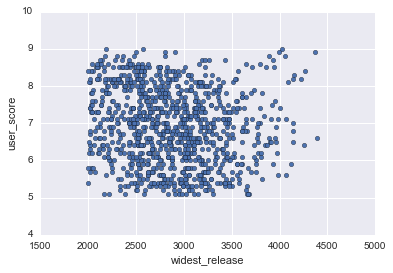

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
full_df_clean.plot(kind='scatter' , x='widest_release',y='user_score')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     19.69
Date:                Thu, 12 May 2016   Prob (F-statistic):           1.01e-05
Time:                        14:54:38   Log-Likelihood:                -1400.7
No. Observations:                 993   AIC:                             2805.
Df Residuals:                     991   BIC:                             2815.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              7.7381      0.186     41.509      0.000         7.372     8.104
widest_release    -0.0003   6.41e-05     -4.438      0.000        -0.000    -0.000
==============================================================================
Omnibus:                      177.147   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.566
Skew:                           0.020   Prob(JB):                     4.22e-09
Kurtosis:                       2.035   Cond. No.                     1.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

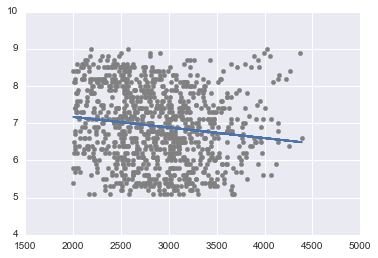

In [88]:
import statsmodels.api as sm
Y = full_df_clean.user_score
X = sm.add_constant(full_df_clean.widest_release)

linmodel = sm.OLS(Y,X).fit()
predicted_score = linmodel.predict(X)
plt.scatter(full_df_clean.widest_release, full_df_clean.user_score, color='gray')
plt.plot(full_df_clean.widest_release, predicted_score)
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6936
Date:                Thu, 12 May 2016   Prob (F-statistic):              0.405
Time:                        15:01:27   Log-Likelihood:                -560.09
No. Observations:                 394   AIC:                             1124.
Df Residuals:                     392   BIC:                             1132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 7.0821      0.140     50.483      0.000         6.806     7.358
production_budget -1.157e-09   1.39e-09     -0.833      0.405     -3.89e-09  1.57e-09
==============================================================================
Omnibus:                       58.996   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.752
Skew:                           0.027   Prob(JB):                     0.000626
Kurtosis:                       2.054   Cond. No.                     2.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

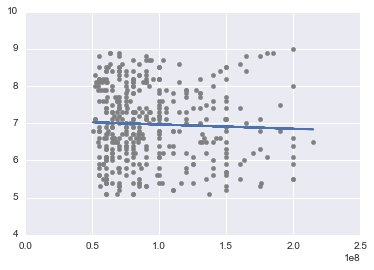

In [98]:
Y = full_df_clean.user_score
X = sm.add_constant(full_df_clean.production_budget)
linmodel_prod = sm.OLS(Y,X).fit()
predicted_score_new = linmodel_prod.predict(X)
plt.scatter(full_df_clean.production_budget, full_df_clean.user_score, color='gray')
plt.plot(full_df_clean.production_budget, predicted_score_new)
linmodel_prod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.298
Date:                Thu, 12 May 2016   Prob (F-statistic):            0.00419
Time:                        15:06:53   Log-Likelihood:                -556.31
No. Observations:                 394   AIC:                             1117.
Df Residuals:                     392   BIC:                             1125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   6.7260      0.099     67.698      0.000         6.531     6.921
opening_per_theater  2.607e-05   9.05e-06      2.881      0.004      8.28e-06  4.39e-05
==============================================================================
Omnibus:                       75.077   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.315
Skew:                           0.005   Prob(JB):                     0.000287
Kurtosis:                       2.003   Cond. No.                     2.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

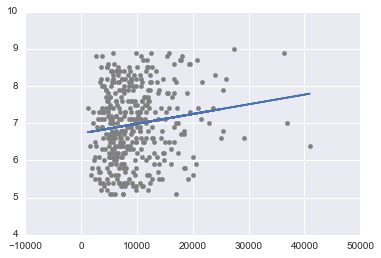

In [99]:
Y = full_df_clean.user_score
X = sm.add_constant(full_df_clean.opening_per_theater)
linmodel_prod = sm.OLS(Y,X).fit()
predicted_score_open = linmodel_prod.predict(X)
plt.scatter(full_df_clean.opening_per_theater, full_df_clean.user_score, color='gray')
plt.plot(full_df_clean.opening_per_theater, predicted_score_open)
linmodel_prod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     13.27
Date:                Thu, 12 May 2016   Prob (F-statistic):           2.90e-08
Time:                        15:20:19   Log-Likelihood:                -541.29
No. Observations:                 394   AIC:                             1091.
Df Residuals:                     390   BIC:                             1106.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   7.2306      0.436     16.589      0.000         6.374     8.087
runtime_minutes         0.0048      0.002      2.066      0.040         0.000     0.009
opening_per_theater  4.417e-05   1.01e-05      4.368      0.000      2.43e-05   6.4e-05
widest_release         -0.0004   9.69e-05     -4.161      0.000        -0.001    -0.000
==============================================================================
Omnibus:                       31.164   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.794
Skew:                           0.030   Prob(JB):                      0.00453
Kurtosis:                       2.191   Cond. No.                     1.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

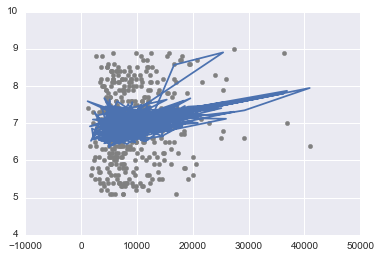

In [108]:
Y = full_df_clean.user_score
X = sm.add_constant(full_df_clean[['runtime_minutes','opening_per_theater','widest_release']])
linmodel_prod = sm.OLS(Y,X).fit()
predicted_score_open = linmodel_prod.predict(X)
plt.scatter(full_df_clean.opening_per_theater, full_df_clean.user_score, color='gray')
plt.plot(full_df_clean.opening_per_theater, predicted_score_open)
#plt.scatter(full_df_clean.widest_release, full_df_clean.user_score, color='gray')
#plt.plot(full_df_clean.widest_release, predicted_score_open)
#plt.scatter(full_df_clean.production_budget, full_df_clean.user_score, color='gray')
#plt.plot(full_df_clean.production_budget, predicted_score_open)

linmodel_prod.summary()

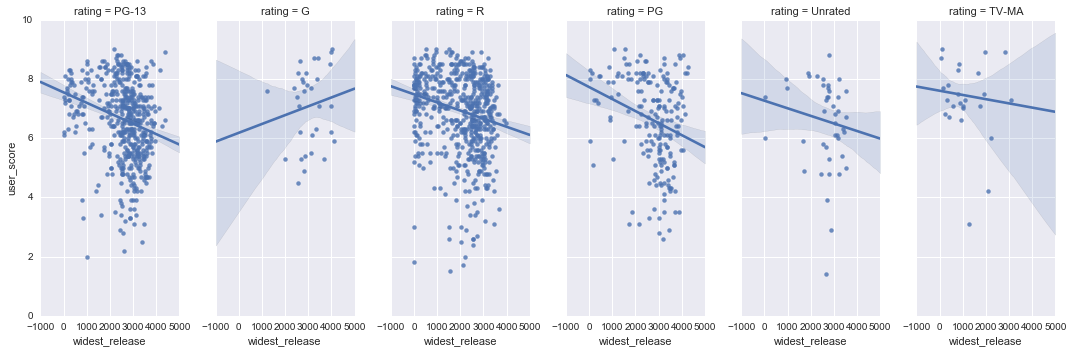

In [114]:

N = 6
top_ratings = full_df_clean.rating.value_counts().index[:N]
top_rating_movies = full_df_clean[full_df_clean['rating'].isin(top_ratings)]
sns.lmplot(x="widest_release", y="user_score", data=top_rating_movies, logx=False, col="rating",aspect=.5, robust=True)

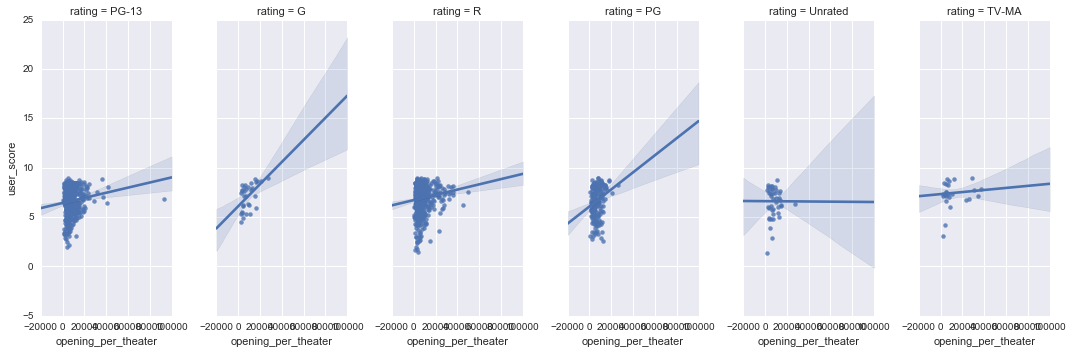

In [115]:
sns.lmplot(x="opening_per_theater", y="user_score", data=top_rating_movies, logx=False, col="rating",aspect=.5, robust=True)